In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='mpb@##9096434705',
    database='e_commerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = "C:\python + sql project"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
pip install mysql-connector-python

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db=mysql.connector.connect(host="localhost",
                       username="root",
                       password="mpb@##9096434705",
                       database="e_commerce")

cur = db.cursor()

# 1. List all unique cities where customers are located.

In [8]:
query = """ select distinct(customer_city) from customers """

cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [10]:
query = """ select count(order_id) as 2017_orders from orders where year(order_purchase_timestamp) = "2017" """

cur.execute(query)
data=cur.fetchall()
data

[(45101,)]

# 3. Find the total sales per category.

In [16]:
query = """ select pd.product_category, round(sum(p.payment_value),2)
        from products pd join order_items oi on pd.product_id=oi.product_id join payments p
        on oi.order_id=p.order_id
        group by pd.product_category"""

cur.execute(query)
data=cur.fetchall()
data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('Fashion Bags and Accessories', 218158.28),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

# 4. Calculate the percentage of orders that were paid in installments.

In [22]:
query = """ select sum(case when payment_installments>= 1 then 1
        else 0 end)/count(*)*100 from payments"""

cur.execute(query)
data=cur.fetchall()
"The percentage of ordered they were paid in installment",data

('The percentage of ordered they were paid in installment',
 [(Decimal('99.9981'),)])

# 5. Count the number of customers from each state. 

In [25]:
query = """ select customer_state, count(customer_id) from customers group by customer_state"""

cur.execute(query)
data=cur.fetchall()
state_wise_customers = pd.DataFrame(data, columns=["state","customers"])
state_wise_customers

,state,customers
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


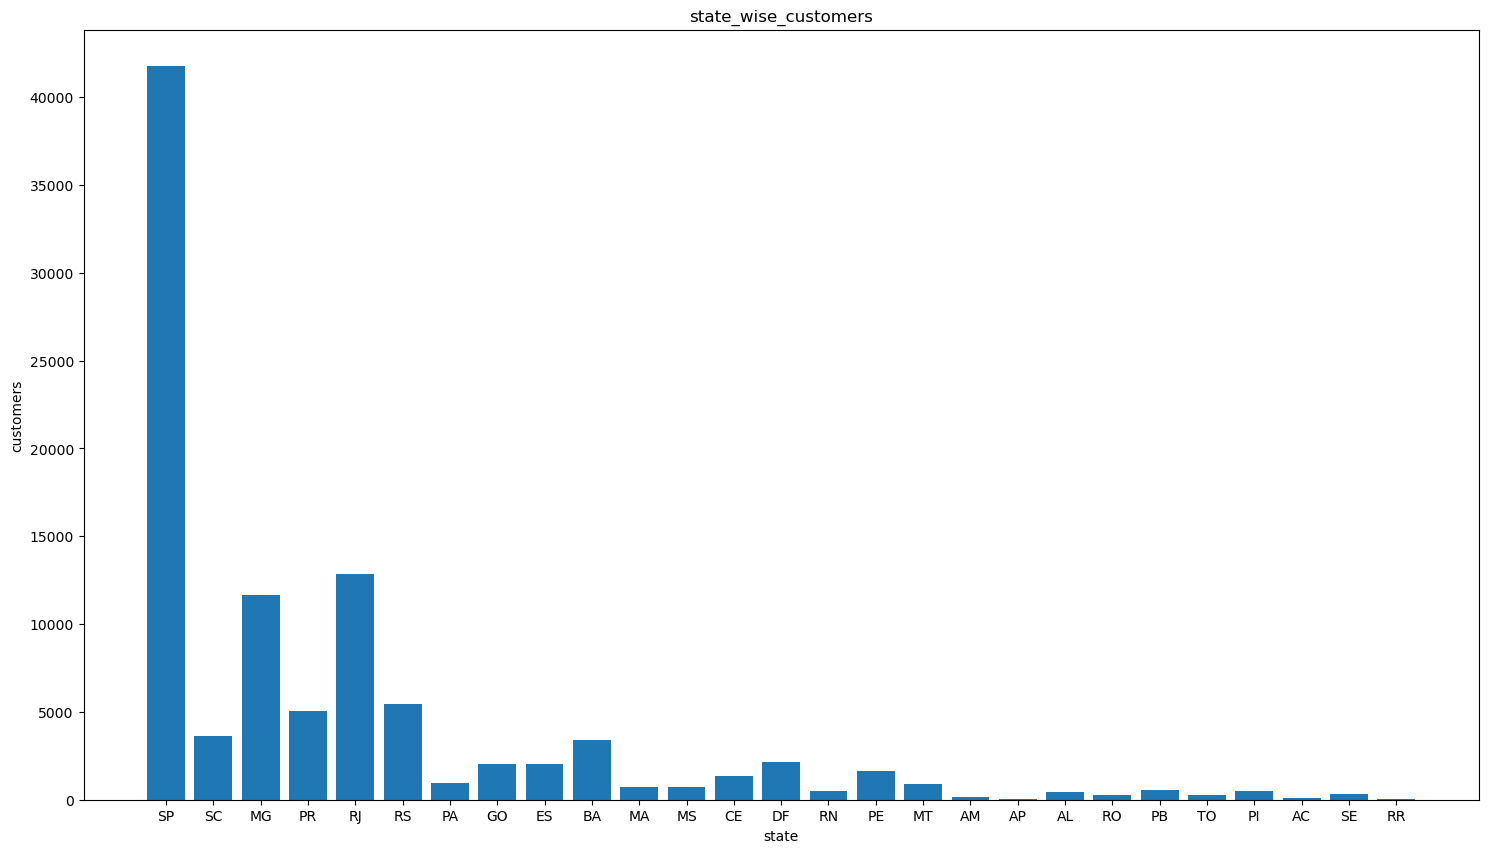

In [26]:
plt.figure(figsize=(18,10))
plt.bar(state_wise_customers.state,
       state_wise_customers.customers)
plt.xlabel("state")
plt.ylabel("customers")
plt.title("state_wise_customers")
plt.show()

# 1. Calculate the number of orders per month in 2018.

In [45]:
query = """ select monthname(order_purchase_timestamp) as month ,count(order_id) as no_of_order_per_month from orders
              where year(order_purchase_timestamp)=2018
              group by month
             order by month desc"""

cur.execute(query)
data=cur.fetchall()
order_2018 = pd.DataFrame(data, columns=["month","orders"])
order_2018

,month,orders
0,September,16
1,October,4
2,May,6873
3,March,7211
4,June,6167
5,July,6292
6,January,7269
7,February,6728
8,August,6512
9,April,6939


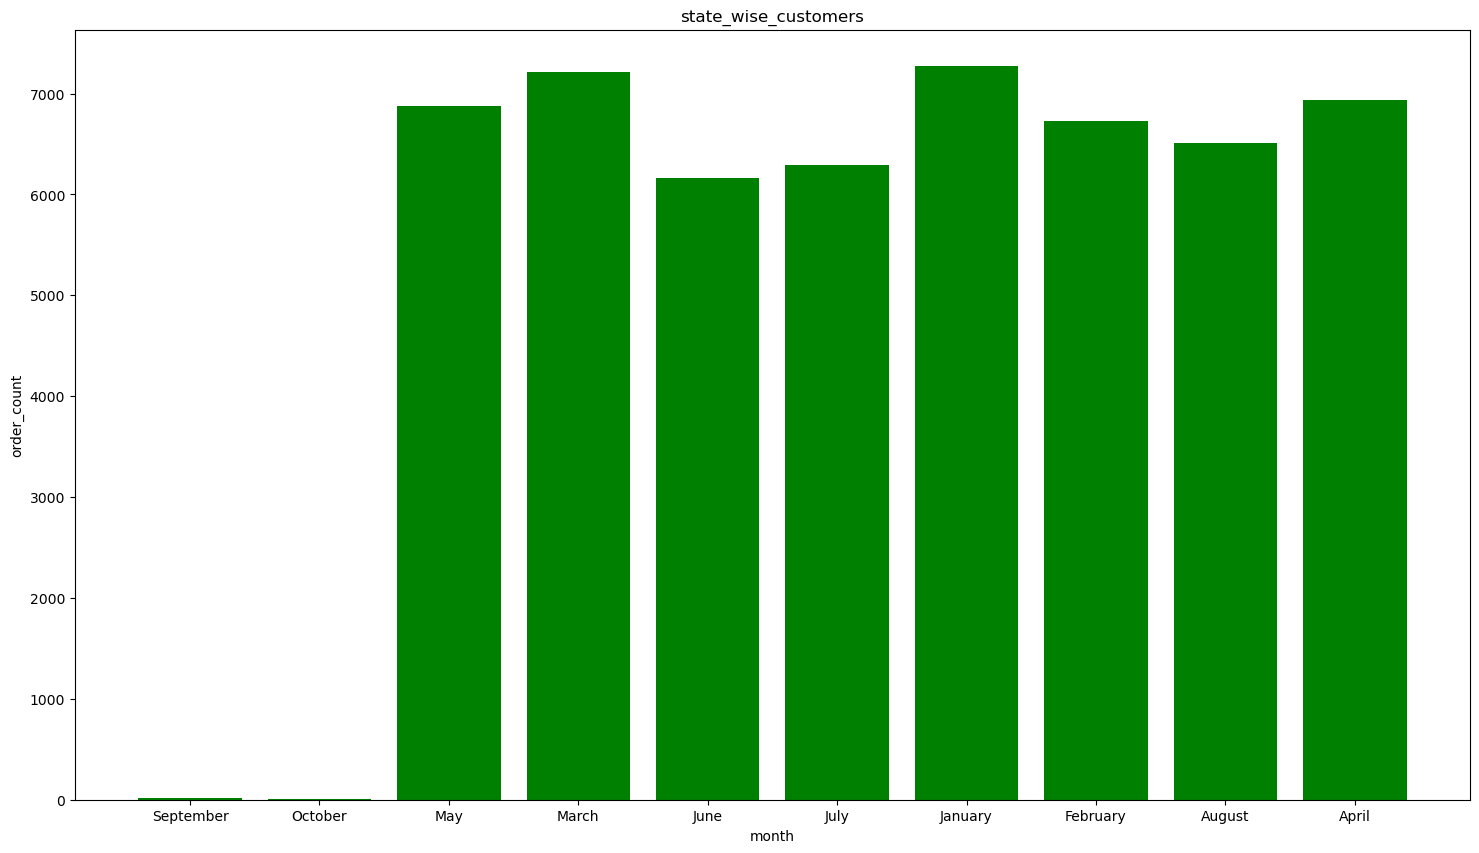

In [49]:
plt.figure(figsize=(18,10))
plt.bar(order_2018.month,
       order_2018.orders,
       color="green")
plt.xlabel("month")
plt.ylabel("order_count")
plt.title("state_wise_customers")
plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [59]:
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
          from orders join order_items
           on orders.order_id=order_items.order_id
           group by orders.order_id, orders.customer_id)
           
           select customers.customer_city,round(avg(count_per_order.oc),2)
           from customers join count_per_order
           on customers.customer_id = count_per_order.customer_id
           group by customers.customer_city"""

cur.execute(query)
data=cur.fetchall()
avg_pro_order=pd.DataFrame(data,columns=["customer_city","average_orders"])
avg_pro_order.head()

,customer_city,average_orders
0,sao jose dos campos,1.14
1,indaial,1.12
2,treze tilias,1.27
3,sao paulo,1.16
4,rio de janeiro,1.15


# 3. Calculate the percentage of total revenue contributed by each product category.

In [64]:
query = """ SELECT 
    product_category, 
    ROUND((SUM(payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS percentage_sales
FROM 
    products  
JOIN 
    order_items ON products.product_id = order_items.product_id 
JOIN 
    payments ON order_items.order_id = payments.order_id
GROUP BY 
    product_category
ORDER BY 
    percentage_sales DESC;

        
        """

cur.execute(query)
data=cur.fetchall()
per_pro_con_rev = pd.DataFrame(data, columns=["product","contribution"])
per_pro_con_rev

,product,contribution
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [72]:
query = """ SELECT  products.product_category,count(order_items.product_id),
          round(avg(order_items.price),2)
         from products join order_items
         on products.product_id=order_items.product_id
         group by products.product_category
    

        
        """

cur.execute(query)
data=cur.fetchall()
price_product=pd.DataFrame(data,
                           columns=["product","order_count","price"])
price_product

,product,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [73]:
import numpy as np
arr_1=price_product['order_count']
arr_2=price_product['price']

np.corrcoef([arr_1,arr_2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 5. Calculate the total revenue generated by each seller, and rank them by revenue.


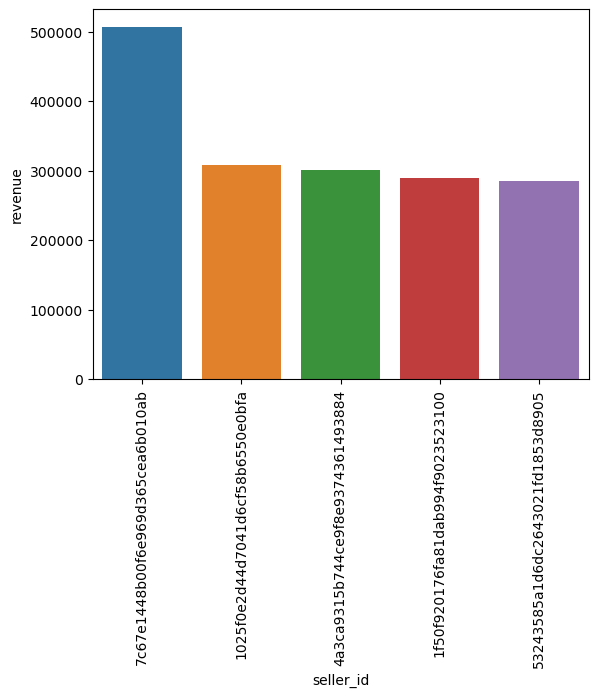

In [88]:
query = """SELECT 
    *, 
    DENSE_RANK() OVER (ORDER BY total_payment DESC) AS rn 
FROM 
    (
        SELECT 
            order_items.seller_id, 
            SUM(payments.payment_value) AS total_payment
        FROM 
            order_items 
        JOIN 
            payments ON order_items.order_id = payments.order_id
        GROUP BY 
            order_items.seller_id
    ) AS subquery;


    

        
        """

cur.execute(query)
data=cur.fetchall()
seller_rank=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
seller_rank=seller_rank.head()
sns.barplot(x="seller_id",
           y="revenue",
           data=seller_rank)
plt.xticks(rotation=90)
plt.show()

# 1. Calculate the moving average of order values for each customer over their order history.

In [94]:
query = """ SELECT 
    customer_id, 
    order_purchase_timestamp,
    AVG(payment_value) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS moving_avg
FROM 
    (
        SELECT 
            orders.customer_id,
            orders.order_purchase_timestamp,
            payments.payment_value
        FROM 
            payments 
        JOIN 
            orders ON payments.order_id = orders.order_id
    ) AS a;

"""

cur.execute(query)
data=cur.fetchall()
pd.DataFrame(data,columns=[""])

,0,1,2
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


# 2. Calculate the cumulative sales per month for each year.

In [95]:
query="""select year, months,payment, sum(payment)
over(order by year, months) as cummulative_sales from
(select year(orders.order_purchase_timestamp) as year,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by year , months
order by year,months) as a; """

cur.execute(query)
data=cur.fetchall()
data

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.340000000004),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.8399999999),
 (2017, 6, 511276.38, 2461605.2199999997),
 (2017, 7, 592382.92, 3053988.1399999997),
 (2017, 8, 674396.32, 3728384.4599999995),
 (2017, 9, 727762.45, 4456146.909999999),
 (2017, 10, 779677.88, 5235824.789999999),
 (2017, 11, 1194882.8, 6430707.589999999),
 (2017, 12, 878401.48, 7309109.069999998),
 (2018, 1, 1115004.18, 8424113.249999998),
 (2018, 2, 992463.34, 9416576.589999998),
 (2018, 3, 1159652.12, 10576228.709999997),
 (2018, 4, 1160785.48, 11737014.189999998),
 (2018, 5, 1153982.15, 12890996.339999998),
 (2018, 6, 1023880.5, 13914876.839999998),
 (2018, 7, 1066540.75, 14981417.589999998),
 (2018, 8, 1022425.32, 16003842.909999998),
 (2018, 9, 4439.54, 16008282.449999997),
 (2018, 10, 589.67, 16008872.11

# 3. Calculate the year-over-year growth rate of total sales.

In [101]:
query="""with a as (select year(orders.order_purchase_timestamp) as year,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by year 
order by year) 

select year,payment, lag(payment,1) over(order by year) previous_years from a"""

cur.execute(query)
data=cur.fetchall()
pd.DataFrame(data,columns=["year","sales","pre_sales"])

,year,sales,pre_sales
0,2016,59362.34,NaN
1,2017,7249746.73,59362.34
2,2018,8699763.05,7249746.73


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [120]:
query = """
WITH a AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM 
        customers 
    JOIN 
        orders ON customers.customer_id = orders.customer_id
    GROUP BY 
        customers.customer_id
), 
b AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS order_count
    FROM 
        a 
    JOIN 
        orders ON orders.customer_id = a.customer_id
        AND orders.order_purchase_timestamp > a.first_order
        AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY 
        a.customer_id
)
SELECT 
    100 * (COUNT(DISTINCT a.customer_id) / NULLIF(COUNT(DISTINCT b.customer_id), 0)) AS percentage
FROM 
    a 
LEFT JOIN 
    b ON a.customer_id = b.customer_id;
"""

# Fetch any previous results to ensure there are no unread results
while cur.nextset():
    pass

# Execute the new query
cur.execute(query)
data = cur.fetchall()
print(data)


[(None,)]


# 5. Identify the top 3 customers who spent the most money in each year.

In [119]:
query = """
SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank
FROM 
    (
        SELECT 
            YEAR(orders.order_purchase_timestamp) AS years,
            orders.customer_id,
            SUM(payments.payment_value) AS payment,
            DENSE_RANK() OVER (
                PARTITION BY YEAR(orders.order_purchase_timestamp)
                ORDER BY SUM(payments.payment_value) DESC
            ) AS d_rank
        FROM 
            orders 
        JOIN 
            payments ON payments.order_id = orders.order_id
        GROUP BY 
            YEAR(orders.order_purchase_timestamp),
            orders.customer_id
    ) AS a
WHERE 
    d_rank <= 3;
"""

# Fetch any previous results
while cur.nextset():
    pass

# Execute the new query
cur.execute(query)
data = cur.fetchall()
data
top_3_customers=pd.DataFrame(data,columns=["year","customer_id","payment","rank"])
top_3_customers

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3
